# We are going to predict that, patient have breast cancer or not ? 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #  for avoid unwanted warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML # for HTMl tag use in python

In [2]:
pd.set_option('display.max_columns',None) # to show maximum number of columns

In [5]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [13]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [14]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [16]:
# convert into dataframe
df = pd.DataFrame(np.c_[data.data, data.target], columns=[list(data.feature_names)+['target']])

In [17]:
df 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [21]:
x = df.drop(columns='target')
y =df['target']

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=46,test_size=0.2)

In [33]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((455, 30), (455, 1), (114, 30), (114, 1))

# Train Naive Bayes Algorithm

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
# train classifer
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [36]:
model_accuracy=round((classifier.score(x_test,y_test)*100),2)
HTML(f'Model Accuracy : <b>{ model_accuracy }%</b>')

In [37]:
#predict model for our test data
from sklearn import metrics 

y_predict=classifier.predict(x_test)
display(HTML(f'Predicted score : <b>{model_accuracy}%</b>'))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        44
         1.0       0.96      0.96      0.96        70

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



# Check manual data

In [40]:
x_checkdata=np.array([df.iloc[21,0:-1].values]) # take a data in array from for all indepent variable or x
y_checkdata=np.array([df.iloc[21,[-1]].values]) # take a data ina array from for depenet variable or y 

# data.iloc[4,0:-1].values ------ it means all row 4th all data expect last one  

y_predict_checkdata=classifier.predict(x_checkdata)
#dataset.target_names #array(['malignant', 'benign'])

if y_predict_checkdata == 0:
    display(HTML(f'I am <b>{model_accuracy}%</b> Sure, that Patient Has <b>Cancer</b> ( {data.target_names[0]} )'))
else:
    display(HTML(f'I am <b>{model_accuracy}%</b> Sure, that Patient Has <b> No Cancer</b> ( {data.target_names[1]} )'))

# Cross verification our manual data is correct or not ?

In [41]:
# display(HTML(f'Our Above Prediction is <b>{round(metrics.accuracy_score(y_checkdata,y_predict),4)*100}%</b> Correct'))
if y_checkdata == y_predict_checkdata:
    display(HTML(f'Our Above Prediction is <b>Correct</b>'))
else:
    display(HTML(f'Our Above Prediction is <b>Wrong</b>'))

In [42]:
from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(y_test,y_predict)
cm

array([[41,  3],
       [ 3, 67]], dtype=int64)

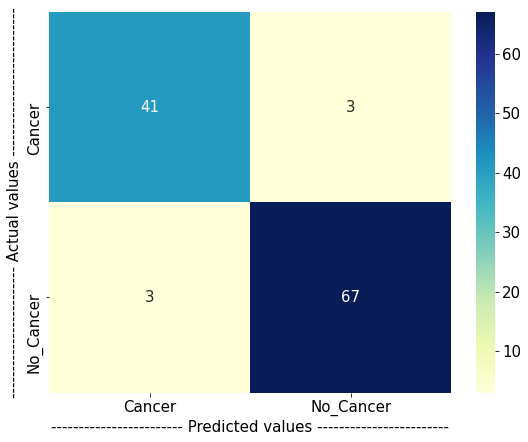

In [44]:
conf_matrix=pd.DataFrame(data=cm,columns=['Cancer','No_Cancer'],index=['Cancer','No_Cancer'])
# conf_matrix=pd.DataFrame(data=cm,columns=['Predicted: Cancer','Predicted: No_Cancer'],index=['Actual: Cancer','Actual: No_Cancer'])
plt.figure(figsize = (9,7))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");
plt.xlabel('------------------------ Predicted values ------------------------')
plt.ylabel('------------------------ Actual values ---------------------------')
plt.rcParams.update({'font.size': 17})

# why we should take gaussianNB not multinomialNB and BernouliNB ?

In [48]:
from sklearn.naive_bayes import MultinomialNB

In [68]:
classifier_Multi = MultinomialNB()
classifier_Multi.fit(x_train,y_train)
display(HTML(f'MultinomialNB Model accuracy is <b>{round((classifier_Multi.score(x_test,y_test))*100,2)}</b>%'))

In [47]:
from sklearn.naive_bayes import BernoulliNB

In [67]:
classifier_Bernaouli = BernoulliNB()
classifier_Bernaouli.fit(x_train,y_train)
display(HTML(f'BernoulliNB Model accuracy is <b>{round((classifier_Bernaouli.score(x_test,y_test))*100,2)}</b>%')) 

# GaussinaNb have more accurate then multinomial and bernoauli 